<a href="https://colab.research.google.com/github/GitMarco27/TMML/blob/main/Notebooks/003_Cat_vs_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3 Minutes Machine Learning
## Episode 3: Cat vs Dog Binary Classifier

#### Marco Sanguineti, 2021
---
Welcome to 3 minutes Machine Learning!

In [36]:
import os
import zipfile
import tensorflow as tf
import numpy as np
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [37]:
def loadThumb(path):
  # Let's import this video thumbnail!
  myThumb = plt.imread(path)
  fig, ax = plt.subplots(figsize=(15, 10))
  plt.axis('off')
  ax.imshow(myThumb)
  plt.show()

In [38]:
# loadThumb('/tmp/yt_thumb_003.png')

#### Video Topics
> 1. Import Cat vs Dog Dataset
> 2. Create a Convolutional Binary Classifier
> 3. Test your model with new images
> 4. See you on next video! 

# Import Cat vs Dog Dataset
---

In [39]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2021-06-05 12:30:51--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 2607:f8b0:4023:c03::80, 2607:f8b0:4023:c06::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   122MB/s    in 0.5s    

2021-06-05 12:30:52 (122 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [40]:
my_zip = '/tmp/cats_and_dogs_filtered.zip'
new = zipfile.ZipFile(my_zip, 'r')
new.extractall('/tmp')
new.close()

In [41]:
base_directory = '/tmp/cats_and_dogs_filtered'
train_directory = os.path.join(base_directory, 'train')
validation_directory = os.path.join(base_directory, 'validation')

In [42]:
train_cats_directory = os.path.join(train_directory, 'cats')
train_dogs_directory = os.path.join(train_directory, 'dogs')
validation_cats_directory = os.path.join(validation_directory, 'cats')
validation_dogs_directory = os.path.join(validation_directory, 'dogs')

In [43]:
train_cat_names = os.listdir(train_cats_directory)
train_dog_names = os.listdir(train_dogs_directory)
print(train_cat_names[:3])
print(train_dog_names[:3])

['cat.872.jpg', 'cat.595.jpg', 'cat.144.jpg']
['dog.337.jpg', 'dog.661.jpg', 'dog.232.jpg']


In [44]:
print(f'n° of training cat images : {len(os.listdir(train_cats_directory))}')
print(f'n° of training dog images : {len(os.listdir(train_dogs_directory))}')

print(f'n° of validation cat images : {len(os.listdir(validation_cats_directory))}')
print(f'n° of validation dog images : {len(os.listdir(validation_dogs_directory))}')

n° of training cat images : 1000
n° of training dog images : 1000
n° of validation cat images : 500
n° of validation dog images : 500


In [45]:
n_rows = 4
n_cols = 4
index = 0

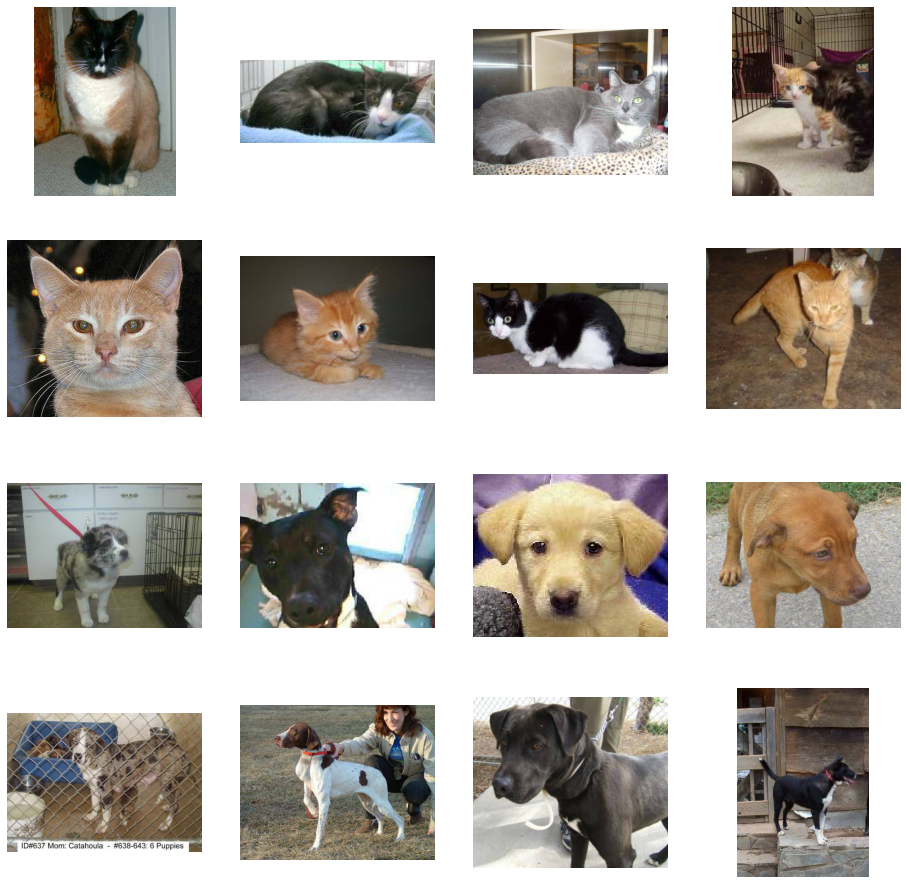

In [46]:
fig = plt.gcf()
fig.set_size_inches(n_cols*4, n_rows*4)

index+=8

next_cat_pix = [os.path.join(train_cats_directory, fname) 
                for fname in train_cat_names[index-8:index] 
               ]

next_dog_pix = [os.path.join(train_dogs_directory, fname) 
                for fname in train_dog_names[index-8:index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(n_rows, n_cols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Create a convolutional binary classifier
---

In [47]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [49]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [50]:
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory(train_directory,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))

validation_generator =  test_datagen.flow_from_directory( validation_directory,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [53]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=100,
    epochs=5,
    validation_steps=50)

Epoch 1/5
100/100 [==============================] - 16s 157ms/step - loss: 0.5550 - accuracy: 0.7140 - val_loss: 0.5811 - val_accuracy: 0.6880
Epoch 2/5
100/100 [==============================] - 16s 157ms/step - loss: 0.5441 - accuracy: 0.7205 - val_loss: 0.5871 - val_accuracy: 0.6980
Epoch 3/5
100/100 [==============================] - 16s 158ms/step - loss: 0.5504 - accuracy: 0.7010 - val_loss: 0.5268 - val_accuracy: 0.7320
Epoch 4/5
100/100 [==============================] - 16s 159ms/step - loss: 0.5570 - accuracy: 0.7085 - val_loss: 0.5722 - val_accuracy: 0.7110
Epoch 5/5
100/100 [==============================] - 16s 160ms/step - loss: 0.5491 - accuracy: 0.7335 - val_loss: 0.5086 - val_accuracy: 0.7440


# Test with new images
---

In [59]:
uploaded=files.upload()
for fn in uploaded.keys():
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  
  if classes[0]>0:
    print(f"{fn} is a dog!")
    
  else:
    print(f"{fn} is a cat!")

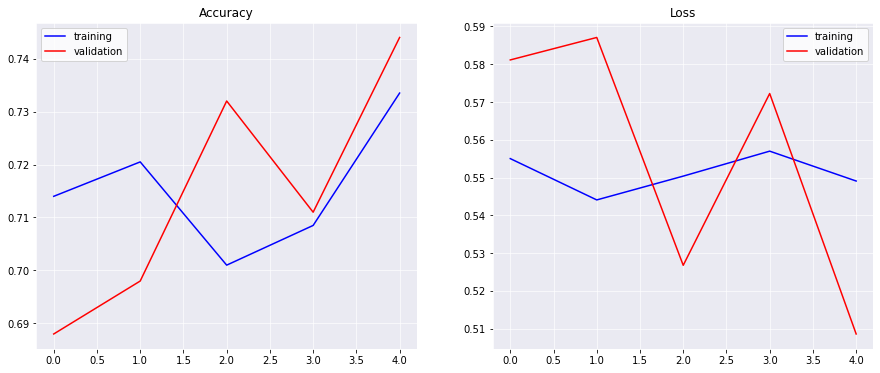

In [65]:
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']
epochs   = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=False)
ax[0].plot(epochs, acc,
          color='b',
          label='training')
ax[0].plot(epochs, val_acc,
          color='r',
          label='validation')
ax[0].set_title('Accuracy')
ax[0].grid(which='both', alpha=0.8, c='white')
ax[0].set_facecolor('#eaeaf2')
ax[0].spines['bottom'].set_color('white')
ax[0].spines['top'].set_color('white')
ax[0].spines['right'].set_color('white')
ax[0].spines['left'].set_color('white')
ax[0].legend()
ax[1].plot(epochs, loss,
          color='b',
          label='training')
ax[1].plot(epochs, val_loss,
          color='r',
          label='validation')
ax[1].set_title('Loss')
ax[1].grid(which='both', alpha=0.8, c='white')
ax[1].set_facecolor('#eaeaf2')
ax[1].spines['bottom'].set_color('white')
ax[1].spines['top'].set_color('white')
ax[1].spines['right'].set_color('white')
ax[1].spines['left'].set_color('white')
ax[1].legend()

plt.show()

# Greetings
---

In [ ]:
!pip install art

In [ ]:
from art import tprint, aprint
tprint('See you on next videos!')

In [ ]:
def subscribe():
  """
  Attractive subscription form
  """
  aprint("giveme", number=5)
  print(f'\n\tLike and subscribe to support this work!\n')
  aprint("giveme", number=5)

In [ ]:
# Let's add some final click-bait content
subscribe()